In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import  train_test_split

# y = ax+b

In [ ]:
* a = slope
* b = intercept
* y = target
* x = single  feature

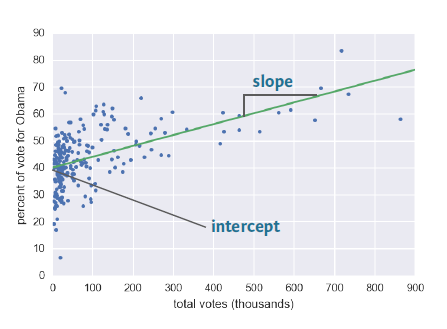

### least squares

In [ ]:
parameters for which the sum of the RSS is minimal
RSS = residual sum of squares

In [ ]:
#a linear regression is a 1st degree polynomial
slope, intercept =  np.polyfit(x, y, 1) 
# 1 for linear functions

## linear regression assumptions

In [ ]:
* erros (Ɛ_i) possuem média 0
* erros apresentam distribuição normal
* variância dos erros (Ɛ_i) –Homocedástico
* correlação entre os erros deve ser próxima de zero ou nula
* variáveis explicativas não podem ser uma combinação linear de outras variáveis explicativas

In [ ]:
reg =  linear_model.LinearRegression()

In [ ]:
reg.fit(X_rooms, y)

In [ ]:
prediction_space =  np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

In [ ]:
plt.scatter(X_rooms,  y, color='blue')
plt.plot(prediction_space,  reg.predict(prediction_space),color='black',  linewidth=3)
plt.show()

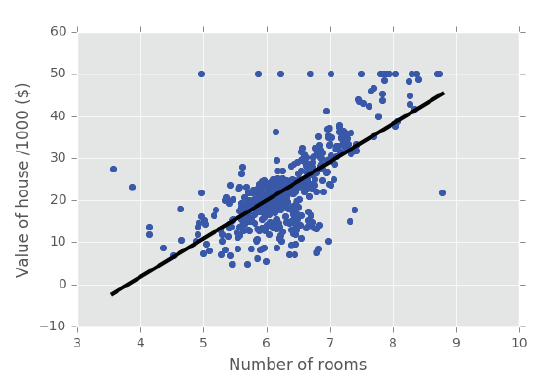

# linear  regression in  higher  dimensions

## y = a1x1 + a2x2  + a3x3 + anxn +  b

In [ ]:
X_train,  X_test, y_train,  y_test =  train_test_split(X, y,test_size = 0.3,  random_state=42)

In [ ]:
reg_all =  linear_model.LinearRegression()
reg_all.fit(X_train,  y_train)

In [ ]:
y_pred =  reg_all.predict(X_test)

In [ ]:
reg_all.score(X_test,  y_test)


# galton

In [3]:
filepath = os.path.join("data", "Galton.csv")
Galton = pd.read_csv(filepath)

In [4]:
Galton.head(10)

,Family,Father,Mother,Gender,Height,Kids
0,1,1.9939,1.7018,M,1.85928,4
1,1,1.9939,1.7018,F,1.75768,4
2,1,1.9939,1.7018,F,1.75260,4
3,1,1.9939,1.7018,F,1.75260,4
4,2,1.9177,1.6891,M,1.86690,4
5,2,1.9177,1.6891,M,1.84150,4
6,2,1.9177,1.6891,F,1.66370,4
7,2,1.9177,1.6891,F,1.66370,4
8,3,1.9050,1.6256,M,1.80340,2
9,3,1.9050,1.6256,F,1.72720,2


In [12]:
#Criando Vetores com Variável Dependente (Resposta) e Independente (Co-variável)
X=Galton['Father']
Y=Galton['Height']

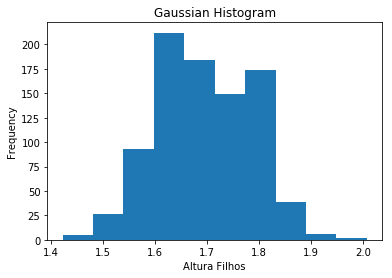

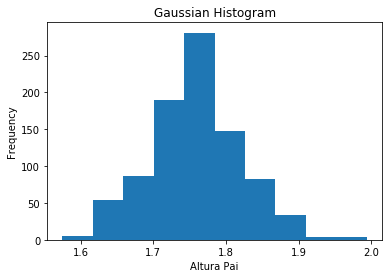

In [7]:
#analisando histograma
plt.hist(Y)
plt.title("Gaussian Histogram")
plt.xlabel("Altura Filhos")
plt.ylabel("Frequency")
plt.show()

plt.hist(X)
plt.title("Gaussian Histogram")
plt.xlabel("Altura Pai")
plt.ylabel("Frequency")
plt.show()

In [13]:
len(X)

890

In [14]:
#criando amostra de teste e treinamento (Cuidado Overfiting)
#transformando em numpy array
X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)

In [15]:
X_train = X[:-445]
X_test = X[-445:]
Y_train = Y[:-445]
Y_test = Y[-445:]

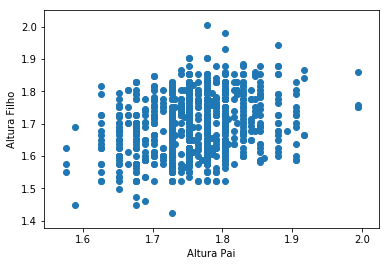

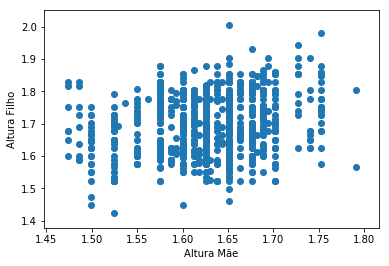

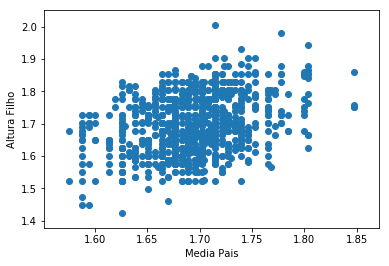

In [16]:
plt.scatter(X,Y)
plt.xlabel("Altura Pai")
plt.ylabel("Altura Filho")
plt.show() 

M = Galton['Mother']
plt.scatter(M,Y)
plt.xlabel("Altura Mãe")
plt.ylabel("Altura Filho")
plt.show() 

Z= (Galton['Father'] + Galton['Mother'])/2

plt.scatter(Z,Y)
plt.xlabel("Media Pais")
plt.ylabel("Altura Filho")
plt.show() 

Z=Z.values.reshape(len(Z),1)
Z_train = Z[:-445]
Z_test = Z[-445:]

In [17]:
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(Z_train, Y_train)

beta1=regr.coef_
intercepto=regr.intercept_

print(beta1)
print(intercepto)

[[ 0.61447521]]
[ 0.65998717]


In [18]:
#R quadrado da amostra de treinamento
regr.score(Z_train,Y_train)

0.05746936718620077

In [19]:
#R quadrado da amostra de teste
predictions = regr.predict(Z_test)
regr.score(predictions,Y_test)

-0.016501795679934261

In [20]:
#regressao linear com altura do pai e da mae
X2_train = Galton[:-445]
X2_test = Galton[-445:]

X2_train=X2_train.drop(["Family"],axis=1)
X2_train=X2_train.drop(["Height"],axis=1)
X2_train=X2_train.drop(["Gender"],axis=1)
X2_train=X2_train.drop(["Kids"],axis=1)

X2_train.head(10)

,Father,Mother
0,1.9939,1.7018
1,1.9939,1.7018
2,1.9939,1.7018
3,1.9939,1.7018
4,1.9177,1.6891
5,1.9177,1.6891
6,1.9177,1.6891
7,1.9177,1.6891
8,1.9050,1.6256
9,1.9050,1.6256


In [21]:
regr.fit(X2_train, Y_train)

beta1=regr.coef_
intercepto=regr.intercept_

print(beta1)
print(intercepto)

[[ 0.25934756  0.32925071]]
[ 0.71045998]


In [22]:
#R quadrado da amostra de treinamento
regr.score(X2_train,Y_train)

0.058226335383287142